<center><b>Deep Learning - Basic Convolutional Network Implementation using Keras</b></center><br>

The code below uses Keras to implement a convolutional network with 3 convolutional layers and 2 fully connected layer.

In [7]:
import os.path
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt
import zipfile

import tensorflow as tf
print(tf.__version__)

2.1.0


In [8]:
# Handle dataset
path = os.getcwd()
data_file = path+"/data/DeepLearning/conv_net_data.zip"

data = zipfile.ZipFile(data_file)
data_file = data.open('data1.h5')

def loadDataH5():
    with h5py.File(data_file,'r') as hf:
      trainX = np.array(hf.get('trainX'))
      trainY = np.array(hf.get('trainY'))
      valX = np.array(hf.get('valX'))
      valY = np.array(hf.get('valY'))
      print (trainX.shape,trainY.shape)
      print (valX.shape,valY.shape)
      return trainX, trainY, valX, valY 
 
trainX, trainY, testX, testY = loadDataH5() 

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [9]:
# const variables about the dataset
IMG_DEPTH   = 3
IMG_WIDTH   = 128
IMG_HEIGHT  = 128
NUM_CLASSES = 17


NUM_EPOCHS  = 50

In [10]:
def plot_results(H):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()
    pass

In [11]:
def create_model_architecture(width, height, depth, classes):
    inputShape = (height, width, depth)

    model = tf.keras.Sequential()
    
    # add conv layer 1
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    # add pooling layer 1
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    # add conv layer 2
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    # add pooling layer 2
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    # add conv layer 3
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
    # add pooling layer 3
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    # add fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    # add softmax layer
    model.add(keras.layers.Dense(classes, activation='softmax'))
    return model

In [13]:
# Convolutional Neural Network class. This class creates the model and trains it.
class CNN:
  def __init__(self):
    # Initialise the Model
    self.optimiser = tf.keras.optimizers.SGD()
    self.model = create_model_architecture(IMG_WIDTH, IMG_HEIGHT, IMG_DEPTH, NUM_CLASSES)
    self.model.compile(loss='sparse_categorical_crossentropy', optimizer=self.optimiser, metrics=['accuracy'])

  def train(self, tr_x, tr_y, val_x, val_y):
    # Train the Model
    history = self.model.fit(tr_x, tr_y, batch_size=16, epochs=NUM_EPOCHS, validation_data=(val_x, val_y))

    # Run the validation data for final result as if it was the Test Data because there is no separate Test Data
    validation_result = self.model.evaluate(val_x, val_y)
    print ("Test Data Loss: {:.4f} and Accuracy: {:.2f}%".format(validation_result[0], validation_result[1]*100.0))
    plot_results(history)



Train on 1020 samples, validate on 340 samples
Epoch 1/50
1020/1020 [==============================] - 38s 38ms/sample - loss: 2.8026 - accuracy: 0.0951 - val_loss: 2.7247 - val_accuracy: 0.1294
Epoch 2/50
1020/1020 [==============================] - 29s 28ms/sample - loss: 2.5118 - accuracy: 0.1882 - val_loss: 2.2374 - val_accuracy: 0.2559
Epoch 3/50
1020/1020 [==============================] - 30s 30ms/sample - loss: 2.1314 - accuracy: 0.2775 - val_loss: 2.3359 - val_accuracy: 0.2059
Epoch 4/50
1020/1020 [==============================] - 29s 28ms/sample - loss: 1.9296 - accuracy: 0.3402 - val_loss: 1.9950 - val_accuracy: 0.2912
Epoch 5/50
1020/1020 [==============================] - 29s 28ms/sample - loss: 1.7602 - accuracy: 0.3931 - val_loss: 1.7646 - val_accuracy: 0.3853
Epoch 6/50
1020/1020 [==============================] - 29s 28ms/sample - loss: 1.6009 - accuracy: 0.4647 - val_loss: 1.8362 - val_accuracy: 0.3618
Epoch 7/50
1020/1020 [==============================] - 29s 28ms/

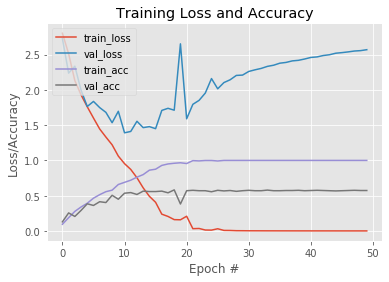

In [14]:
my_CNN = CNN()
my_CNN.train(trainX, trainY, testX, testY)